In [1]:
import numpy as np
import matplotlib.pyplot as plt
from baseline_utils import load_annotations, sanity_plot, combine_and_split, compute_baseline, mean_test_error


# Load and plot annotations

In [2]:
# file path for annotations
left_annotations_file = '../../DATA/annotations_left.txt'
right_annotations_file = '../../DATA/annotations_right.txt'
root_path_left = '../../DATA/images_left/'
root_path_right = '../../DATA/images_right/'

left_img_names, left_coordinates, left_count = load_annotations(left_annotations_file)
right_img_names, right_coordinates, right_count = load_annotations(right_annotations_file, flip_right=True)

Processed 1051 lines.
Processed 1369 lines.


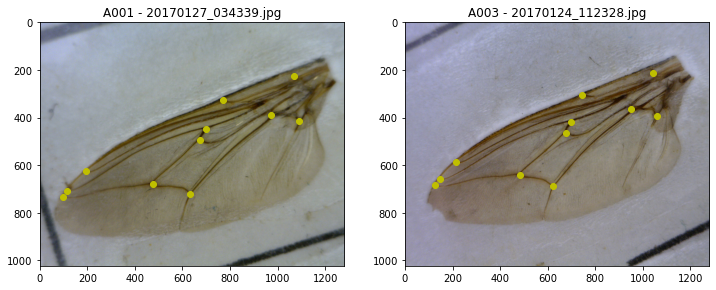

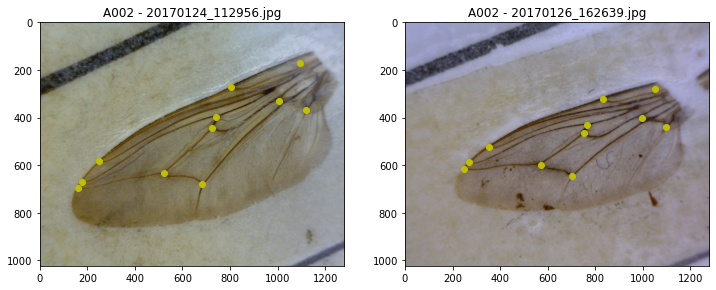

In [3]:
sanity_plot(root_path_left, left_img_names, left_coordinates)
sanity_plot(root_path_right, right_img_names, right_coordinates, right_img = True)

# Data split and baseline implementation
The data is split and the baseline is implemented by calculating the mean coordinate for each landmark.

/var/folders/lt/tx6bj241237f45c8_zrr4w1r0000gn/T/ipykernel_5013/2174877327.py:27: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


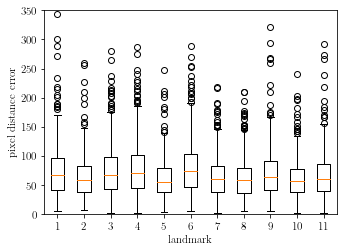

In [8]:
training_landmarks, test_landmarks = combine_and_split(left_coordinates, right_coordinates)
train_mean, train_std = compute_baseline(training_landmarks, plot_mean = False)
landmark_errors = mean_test_error(test_landmarks, train_mean)

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

fig = plt.figure()
fig.set_size_inches(5.251,3.75) 

xticks = [1,2,3,4,5,6,7,8,9,10,11]
plt.boxplot(landmark_errors)

plt.xlabel('landmark')
plt.ylabel('pixel distance error')
plt.ylim([0,350])
plt.savefig('baseline_boxplot.pdf', bbox_inches="tight", dpi=1000)
plt.show()